In [21]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer
from scipy import stats

import env
import os
import wrangle as w
import explore as e

import warnings
warnings.filterwarnings("ignore")

## 1. Apply the scalers we talked about in this lesson to your data and visualize the results for the unscaled and scaled distribution .

In [2]:
df = w.wrangle_zillow()
df = df.rename(columns={'bedroomcnt' : 'bedrooms',
                       'bathroomcnt' : 'bathrooms',
                       'calculatedfinishedsquarefeet' : 'squarefeet',
                       'taxvaluedollarcnt' : 'salesamount',
                       'fips' : 'county'})
df.county = df.county.map({6037:'LA', 6059:'Orange', 6111:'Ventura'})
train, val, test = w.split_data(df)

this file exists, reading from csv

Train Shape: (1284141, 7)
Validate Shape: (428047, 7)
Test Shape: (428047, 7)
    


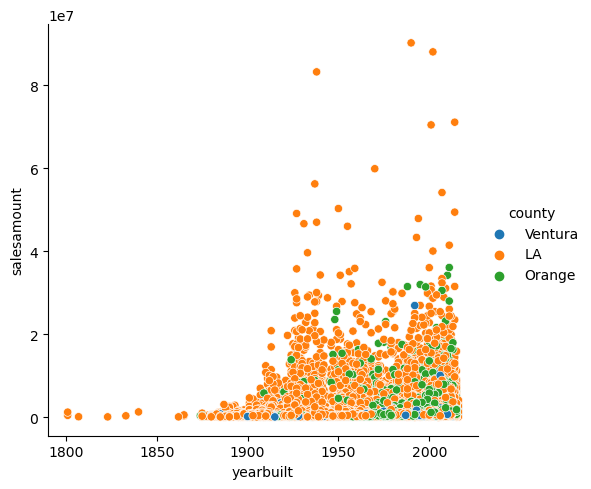

In [3]:
sns.relplot(data=train, x='yearbuilt', y='salesamount', hue='county')

In [4]:
X_train, X_test = train[['yearbuilt', 'salesamount']], test[['yearbuilt', 'salesamount']]
y_train, y_test = train.county, test.county

In [5]:
#KNN
model = KNeighborsClassifier(10)
#fit the model
model.fit(X_train, y_train)
#use it
model.score(X_test, y_test)

0.7413601777374914

In [6]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
model.fit(X_train_scaled, y_train)
model.score(X_test_scaled, y_test)

0.6993881513011422

In [8]:
X_train[['x1_minmax', 'x2_minmax']] = scaler.fit_transform(X_train[['yearbuilt', 'salesamount']])

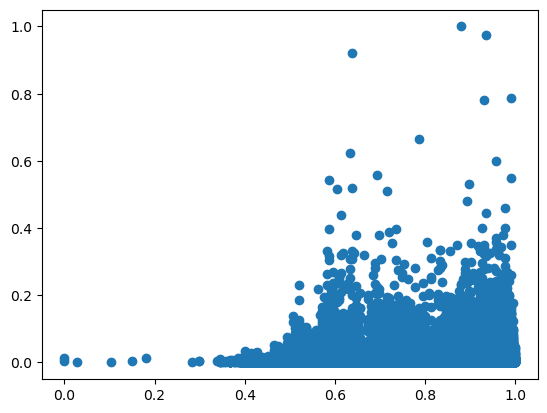

In [9]:
plt.scatter(X_train.x1_minmax, X_train.x2_minmax)

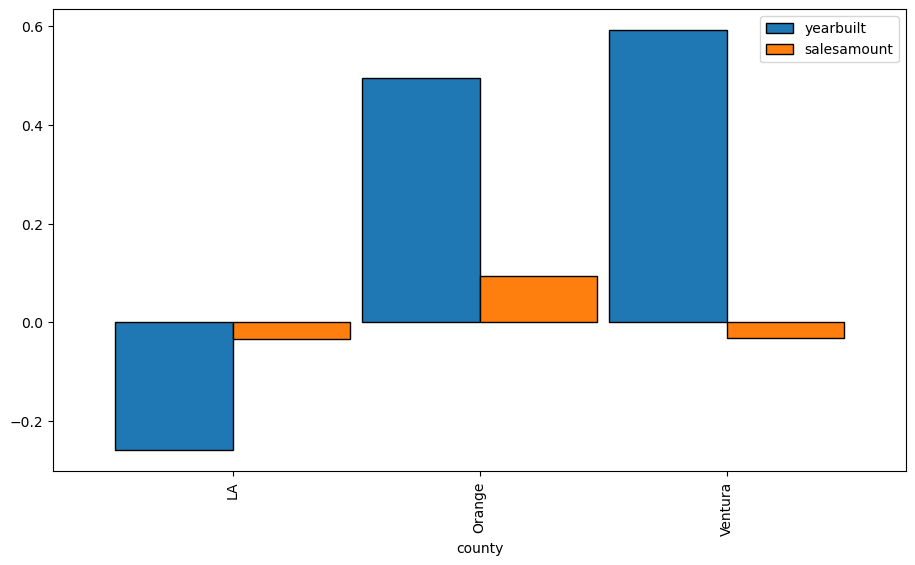

In [20]:
cols = ['yearbuilt', 'salesamount']
scaler = StandardScaler()
train[cols] = scaler.fit_transform(train[cols])
train[['county','yearbuilt', 'salesamount']].groupby('county').mean().plot.bar(figsize=(11, 6), ec='black', width=.95)
X_train_standard = train[cols].copy()

In [11]:
train[['yearbuilt', 'salesamount']] = scaler.inverse_transform(X_train_standard)
X_train_standard.head()

,yearbuilt,salesamount
462820,1.989173,0.363093
3880,0.001396,0.207086
992263,-0.314842,-0.549436
311722,1.718113,-0.153189
787985,0.046572,0.160094


In [17]:
train['yearbuilt'].mean()

1960.9691061962822

In [18]:
train['salesamount'].mean()

460846.25053635077

## 2. Apply the .inverse_transform method to your scaled data. Is the resulting dataset the exact same as the original data?

In [12]:
X_original_trian = scaler.inverse_transform(X_train_scaled)
X_original_test = scaler.inverse_transform(X_test_scaled)

In [13]:
model.score(X_original_trian, y_train)

0.6659447833220806

In [14]:
X_original_trian

array([[  1981.97187608, 466267.87067366],
       [  1977.44186689, 465448.95772167],
       [  1976.72118361, 461477.80094106],
       ...,
       [  1977.85368591, 463139.2617313 ],
       [  1981.56005706, 469352.50560559],
       [  1975.17686229, 461322.89249517]])

In [15]:
X_train

,yearbuilt,salesamount,x1_minmax,x2_minmax
462820,2005,710674,0.948837,0.007880
3880,1961,603333,0.744186,0.006689
992263,1954,82804,0.711628,0.000918
311722,1999,355444,0.920930,0.003941
787985,1962,571000,0.748837,0.006331
...,...,...,...,...
1966409,1963,312978,0.753488,0.003470
1248263,1979,417545,0.827907,0.004629
28211,1965,300584,0.762791,0.003333
279547,2001,1115000,0.930233,0.012363


In [16]:
X_train_scaled

array([[9.48837209e-01, 7.87963513e-03],
       [7.44186047e-01, 6.68944934e-03],
       [7.11627907e-01, 9.17878167e-04],
       ...,
       [7.62790698e-01, 3.33260005e-03],
       [9.30232558e-01, 1.23627596e-02],
       [6.41860465e-01, 6.92738449e-04]])

## 3. Read the documentation for sklearn's QuantileTransformer. Use normal for the output_distribution and apply this scaler to your data. Visualize the result of your data scaling.

In [34]:
qt = QuantileTransformer(n_quantiles=10,output_distribution='normal')
X_train_qt = qt.fit_transform(X_train_scaled, y_train)

(array([[4.00000e+00, 0.00000e+00, 2.00000e+00, 1.93486e+05, 4.53299e+05,
         4.31167e+05, 1.94694e+05, 9.31100e+03, 0.00000e+00, 2.17800e+03],
        [1.10000e+01, 1.70000e+01, 1.02200e+03, 1.90867e+05, 4.56023e+05,
         4.52047e+05, 1.84022e+05, 4.80000e+01, 3.00000e+00, 8.10000e+01]]),
 array([-5.19933758e+00, -4.15947007e+00, -3.11960255e+00, -2.07973503e+00,
        -1.03986752e+00,  4.89217555e-11,  1.03986752e+00,  2.07973503e+00,
         3.11960255e+00,  4.15947007e+00,  5.19933758e+00]),
 <a list of 2 BarContainer objects>)

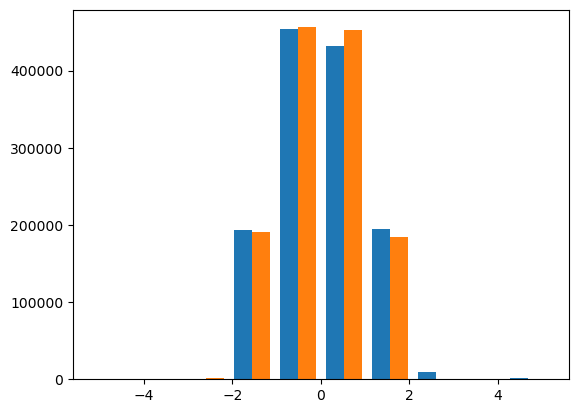

In [42]:
plt.hist(X_train_qt)

## 4. Use the QuantileTransformer, but omit the output_distribution argument. Visualize your results. What do you notice?